# Google BigQuery Connect with Jupyter notebook

In [2]:
import pydata_google_auth
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)

### Import Python module

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [8]:
query2 = """SELECT *
FROM SELECT_PRIMARY_TYPE.PT""" 
project_id = 'modular-magpie-255714'

In [24]:
crime_df = pd.read_gbq(query2, project_id=project_id, dialect='standard', credentials=credentials)

In [26]:
crime = list(crime_df["Primary_Type"])

# 1. 범죄 히트맵

In [10]:
query = """SELECT *
FROM place.pt_year_latlon""" 
project_id = 'modular-magpie-255714'

In [11]:
place = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [17]:
place.head()

,Primary_Type,Year,Latitude,Longitude
0,KIDNAPPING,2001,41.711772,-87.597755
1,ARSON,2001,41.732239,-87.596085
2,INTIMIDATION,2001,41.703055,-87.536644
3,CRIM SEXUAL ASSAULT,2001,41.807100,-87.607588
4,INTERFERENCE WITH PUBLIC OFFICER,2001,41.976160,-87.678044


STALKING
ARSON
HOMICIDE
CRIMINAL TRESPASS
GAMBLING
BATTERY
INTIMIDATION
CRIMINAL DAMAGE
PROSTITUTION
SEX OFFENSE
CRIM SEXUAL ASSAULT
THEFT
LIQUOR LAW VIOLATION
KIDNAPPING
OFFENSE INVOLVING CHILDREN
BURGLARY
MOTOR VEHICLE THEFT
WEAPONS VIOLATION
NARCOTICS
DECEPTIVE PRACTICE
INTERFERENCE WITH PUBLIC OFFICER
PUBLIC PEACE VIOLATION
ROBBERY
ASSAULT


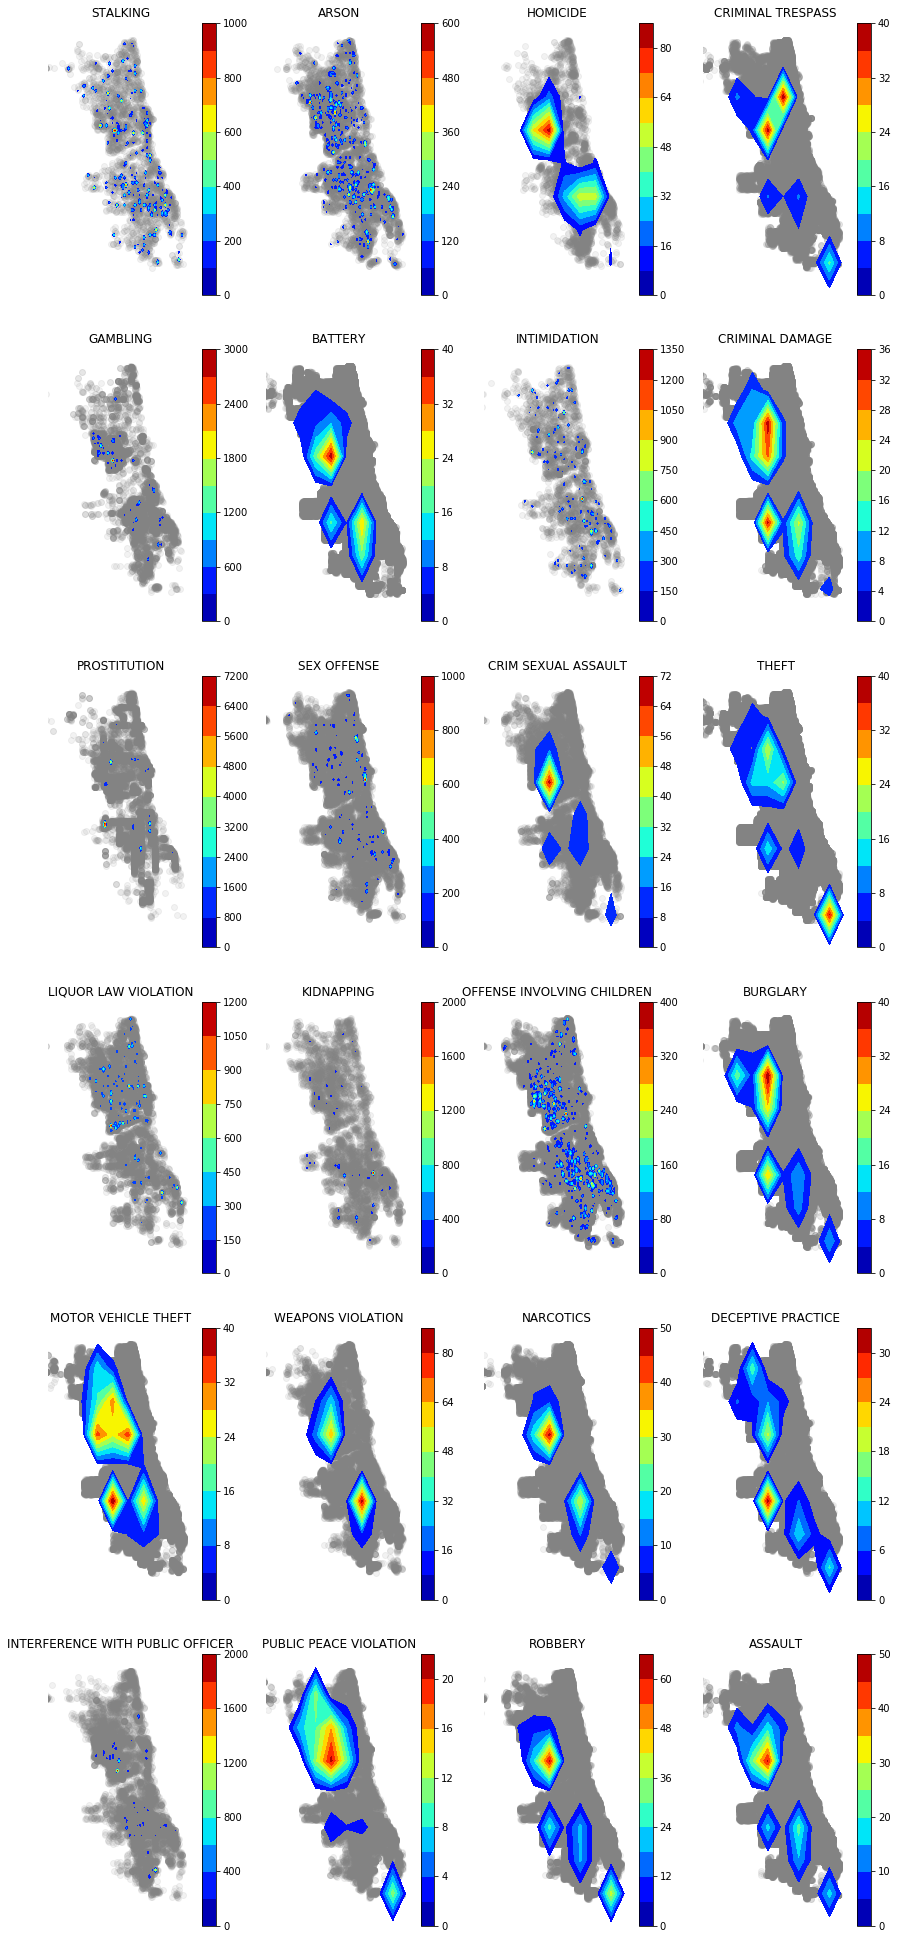

In [34]:
fig = plt.figure(figsize=(15,35))
for i, crime_type in enumerate(crime):
    print(crime_type)
    ax = fig.add_subplot(int(np.ceil(float(len(crime)) / 4)), 4, i+1)
    crimes_ = place[place['Primary_Type']==crime_type]
#     print(crimes_)
    sns.regplot('Longitude', 'Latitude',
               data= crimes_[['Longitude','Latitude']],
               fit_reg=False,
               scatter_kws={'alpha':.1, 'color':'grey'},
               ax=ax)
    sns.kdeplot(
                data= crimes_[['Longitude','Latitude']],
                cmap="jet", 
                bw=.005,
                #n_levels=10,
                cbar=True, 
                shade=True, 
                shade_lowest=False,
                ax = ax)
    ax.set_title(crime_type)
    ax.set_xlim(-87.9,-87.5)
    ax.set_ylim(41.60,42.05)
    ax.set_axis_off()    
 
plt.show()